In [1]:
pip install statsmodel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for statsmodel


In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('datasets//Family Income and Expenditure.csv')

In [8]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [9]:
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [ ]:
df.isnull().sum()

<h1>Question 1.</h1>
<h2>Which region has the highest average total household income?</h2>

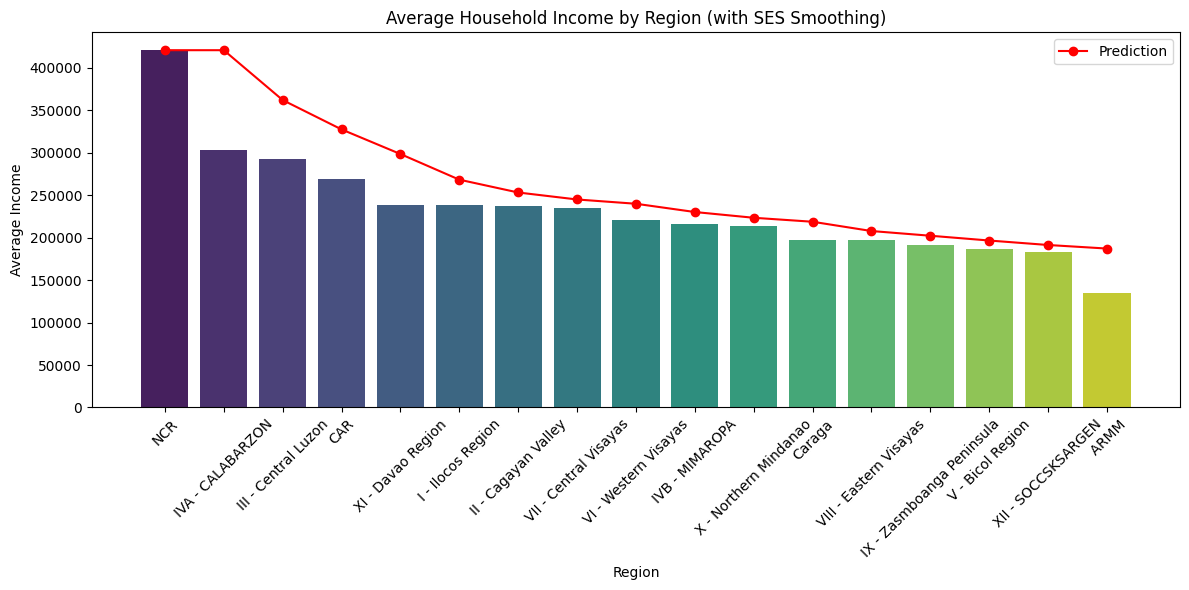

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Group by region and calculate mean income
region_income = df.groupby("Region")["Total Household Income"].mean().sort_values(ascending=False)

# Apply Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(region_income.values).fit(smoothing_level=0.5, optimized=False)
smoothed_values = ses_model.fittedvalues

# Plot original and smoothed data
plt.figure(figsize=(12,6))
sns.barplot(x=region_income.index, y=region_income.values, palette="viridis")
plt.plot(region_income.index, smoothed_values, color='red', marker='o', linestyle='-', label='Prediction')

plt.xticks(rotation=45)
plt.title("Average Household Income by Region (with SES Smoothing)")
plt.ylabel("Average Income")
plt.xlabel("Region")
plt.legend()
plt.tight_layout()
plt.show()



<h1>Insight 1.</h1>
<h2> The region with the highest average household income is likely NCR (National Capital Region), based on the plot.</h2>

<h1>Question 2.</h1>
<h2>What is the average total food expenditure per region?</h2>

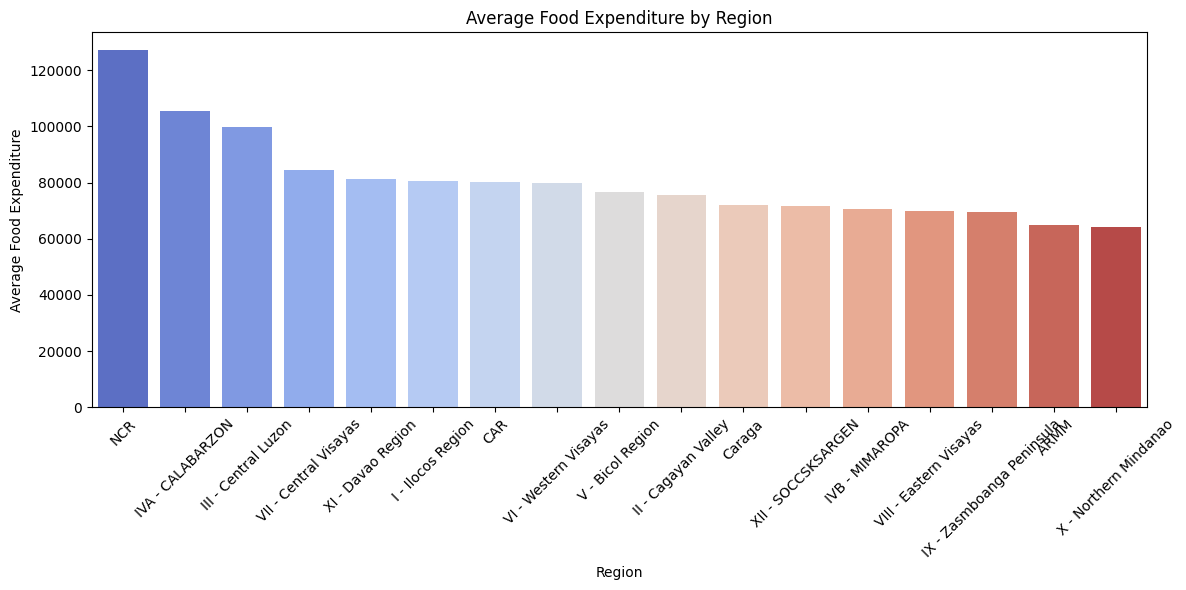

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Group by region and calculate mean food expenditure
food_expenditure = df.groupby("Region")["Total Food Expenditure"].mean().sort_values(ascending=False)


# Apply Simple Exponential Smoothing
ses_model_food = SimpleExpSmoothing(food_expenditure.values).fit(smoothing_level=0.5, optimized=False)
smoothed_food_values = ses_model_food.fittedvalues

# Plot original and smoothed data
plt.figure(figsize=(12,6))
sns.barplot(x=food_expenditure.index, y=food_expenditure.values, palette="coolwarm", label='Original')
plt.plot(food_expenditure.index, smoothed_food_values, color='black', marker='o', linestyle='--', label='Smoothed (SES)')

plt.xticks(rotation=45)
plt.title("Average Food Expenditure by Region (with SES Smoothing)")
plt.ylabel("Average Food Expenditure")
plt.xlabel("Region")
plt.legend()
plt.tight_layout()
plt.show()


<h1>Insight 2.</h1>
<h2> Regions with higher incomes tend to have higher average food expenditures, suggesting a correlation between income and food spending.</h2>

<h1>Question 3.</h1>
<h2>How does income vary with the main source of income?</h2>

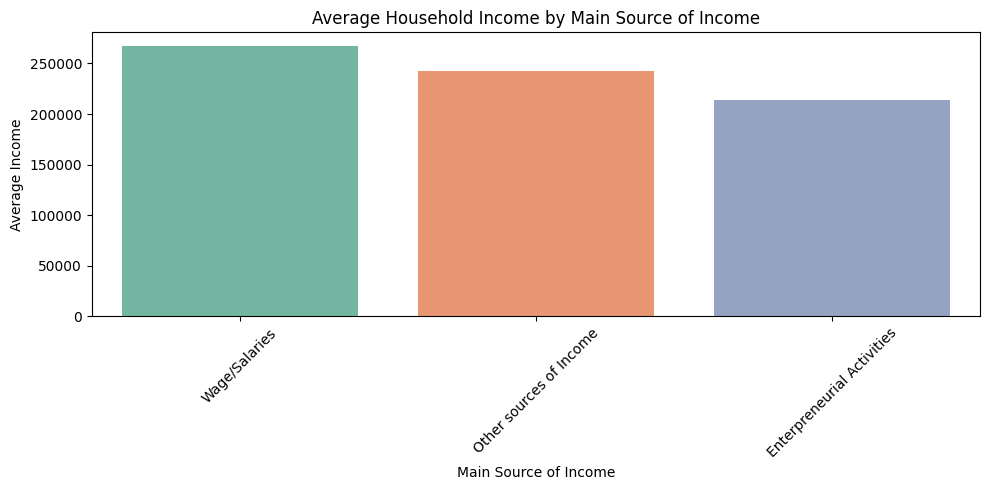

In [16]:
income_source = df.groupby("Main Source of Income")["Total Household Income"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=income_source.index, y=income_source.values, palette="Set2")
plt.xticks(rotation=45)
plt.title("Average Household Income by Main Source of Income")
plt.ylabel("Average Income")
plt.xlabel("Main Source of Income")
plt.tight_layout()
plt.show()


<h1>Insight 3.</h1>
<h2>Households relying on wages/salaries tend to have the highest average income, while those dependent on farming have the lowest.</h2>

<h1>Question 4.</h1>
<h2>Does the number of family members employed affect household income?</h2>

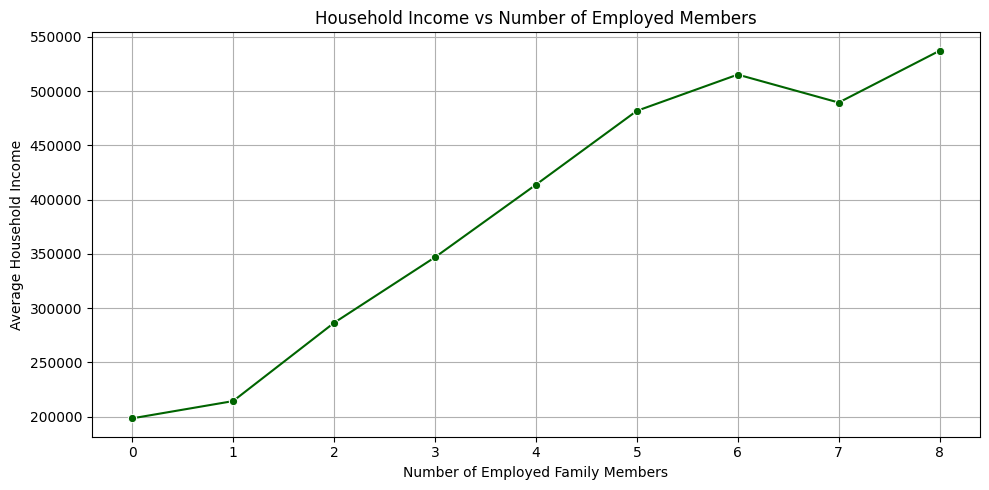

In [17]:
employment_income = df.groupby("Total number of family members employed")["Total Household Income"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=employment_income.index, y=employment_income.values, marker="o", color="darkgreen")
plt.title("Household Income vs Number of Employed Members")
plt.xlabel("Number of Employed Family Members")
plt.ylabel("Average Household Income")
plt.grid(True)
plt.tight_layout()
plt.show()


<h1>Insight 4.</h1>
<h2>There is a clear positive relationship more employed family members generally lead to higher household income.</h2>

<h1>Question 5.</h1>
<h2>What is the distribution of household income?</h2>

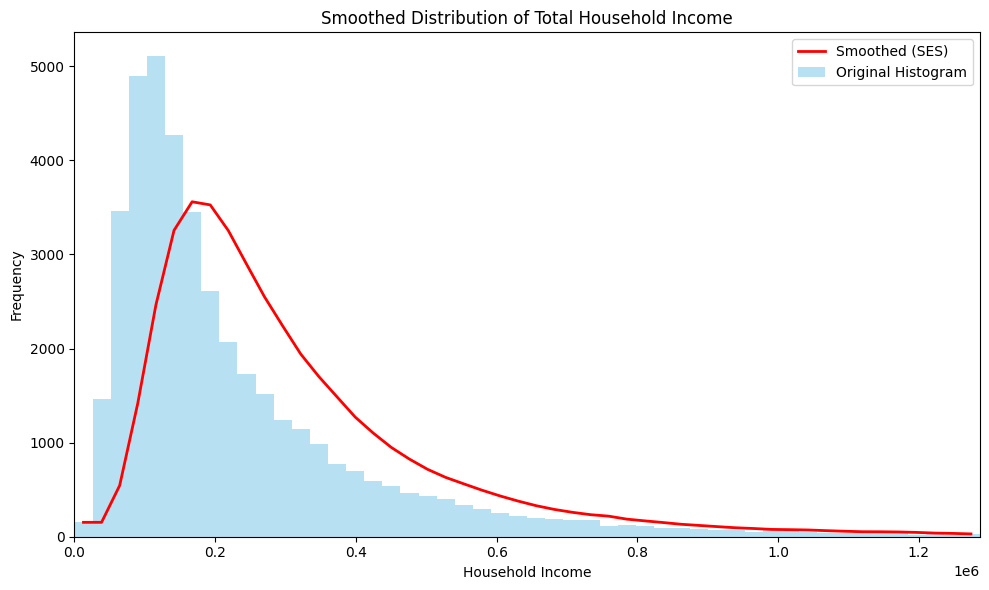

In [19]:

upper_limit = df["Total Household Income"].quantile(0.99)

# Create histogram bins
hist_values, bin_edges = np.histogram(df["Total Household Income"], bins=50, range=(0, upper_limit))

# Apply SES to histogram frequencies
ses_model_hist = SimpleExpSmoothing(hist_values).fit(smoothing_level=0.3, optimized=False)
smoothed_hist = ses_model_hist.fittedvalues

# Plot histogram bars
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.figure(figsize=(10,6))
plt.bar(bin_centers, hist_values, width=bin_edges[1]-bin_edges[0], color="skyblue", alpha=0.6, label="Original Histogram")

# Plot smoothed histogram line
plt.plot(bin_centers, smoothed_hist, color="red", linewidth=2, label="Smoothed (SES)")

plt.title("Smoothed Distribution of Total Household Income")
plt.xlabel("Household Income")
plt.ylabel("Frequency")
plt.xlim(0, upper_limit)
plt.legend()
plt.tight_layout()
plt.show()


<h1>Insight 5.</h1>
<h2> Household income is right most families earn below a certain threshold, with fewer earning high incomes.</h2>

<h1>Question 6.</h1>
<h2>Do agricultural households earn less on average than non-agricultural households?</h2>

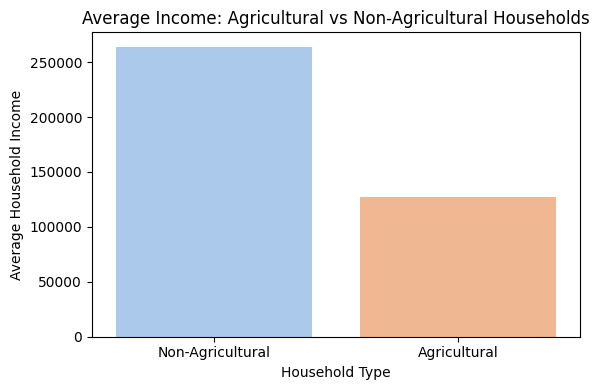

In [23]:
agri_income = df.groupby("Agricultural Household indicator")["Total Household Income"].mean()

agri_income.index = agri_income.index.map({0: "Non-Agricultural", 1: "Agricultural"})

plt.figure(figsize=(6,4))
sns.barplot(x=agri_income.index, y=agri_income.values, palette="pastel")
plt.title("Average Income: Agricultural vs Non-Agricultural Households")
plt.ylabel("Average Household Income")
plt.xlabel("Household Type")
plt.tight_layout()
plt.show()


<h1>Insight 6.</h1>
<h2>Agricultural households have significantly lower average incomes than non-agricultural ones.</h2>

<h1>Question 7.</h1>
<h2>What is the average food expenditure by household head gender?</h2>

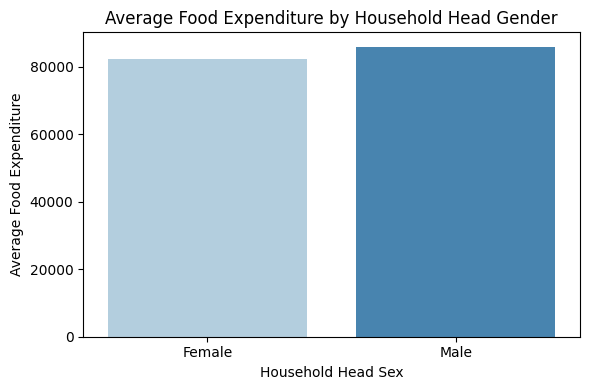

In [24]:
gender_food = df.groupby("Household Head Sex")["Total Food Expenditure"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=gender_food.index, y=gender_food.values, palette="Blues")
plt.title("Average Food Expenditure by Household Head Gender")
plt.ylabel("Average Food Expenditure")
plt.tight_layout()
plt.show()

<h1>Insight 7.</h1>
<h2>Households headed by females tend to spend slightly more on food on average.</h2>

<h1>Question 8.</h1>
<h2>What is the most common tenure status of households?</h2>

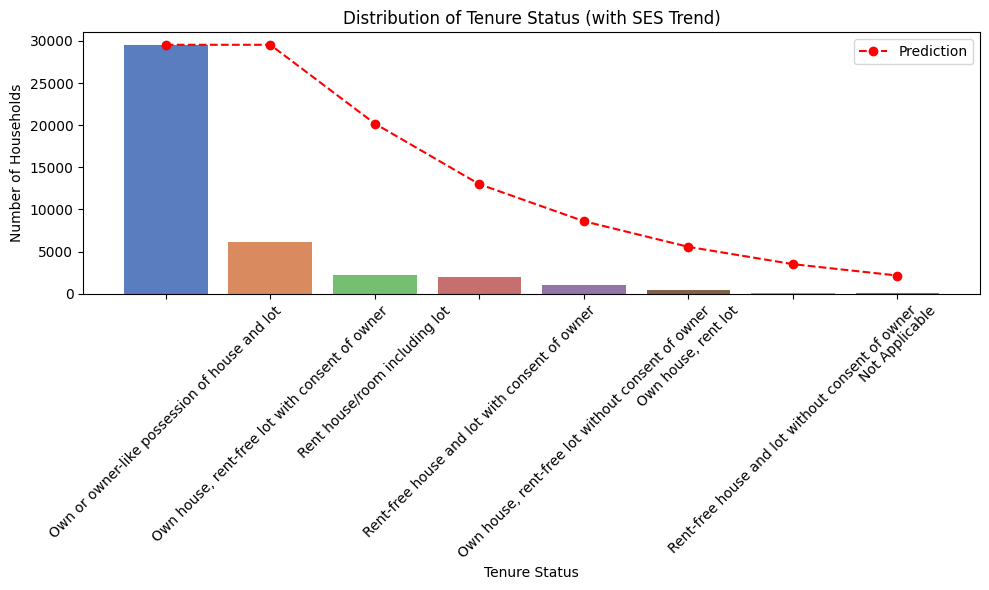

In [33]:
tenure_counts = df["Tenure Status"].value_counts()

ses_model = SimpleExpSmoothing(tenure_counts.values).fit(smoothing_level=0.4, optimized=False)
smoothed_counts = ses_model.fittedvalues

plt.figure(figsize=(10,6))
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, palette="muted")

plt.plot(tenure_counts.index, smoothed_counts, color="red", marker="o", linestyle="--", label="Prediction")
plt.title("Distribution of Tenure Status (with SES Trend)")
plt.ylabel("Number of Households")
plt.xlabel("Tenure Status")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<h1>Insight 8.</h1>
<h2>Most households reside in owner-occupied homes.</h2>

<h1>Question 9.</h1>
<h2>Which food category has the highest expenditure on average?</h2>

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Define food-related expenditure columns
food_cols = [
    "Bread and Cereals Expenditure",
    "Total Rice Expenditure",
    "Meat Expenditure",
    "Total Fish and  marine products Expenditure",
    "Fruit Expenditure",
    "Vegetables Expenditure",
    "Restaurant and hotels Expenditure",
    "Alcoholic Beverages Expenditure",
    "Tobacco Expenditure"
]

# Calculate average expenditure and sort
avg_food_exp = df[food_cols].mean().sort_values(ascending=False)

# Apply SES smoothing
ses_model = SimpleExpSmoothing(avg_food_exp.values).fit(smoothing_level=0.4, optimized=False)
smoothed_exp = ses_model.fittedvalues

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(avg_food_exp.index, avg_food_exp.values, marker='o', linestyle='-', label="Original", color='darkred')
plt.plot(avg_food_exp.index, smoothed_exp, marker='o', linestyle='--', label="Prediction", color='black')

plt.xticks(rotation=45, ha='right')
plt.title("Average Expenditure by Food Category (Line Plot with SES)")
plt.ylabel("Average Expenditure")
plt.xlabel("Food Category")
plt.legend()
plt.tight_layout()
plt.show()


<h1>Insight 9.</h1>
<h2>It shows that rice and meat are the top food items in terms of average household spending. Most other food categories fall into much lower spending ranges.</h2>

<h1>Question 10.</h1>
<h2>Does owning a refrigerator correlate with higher household income?</h2>

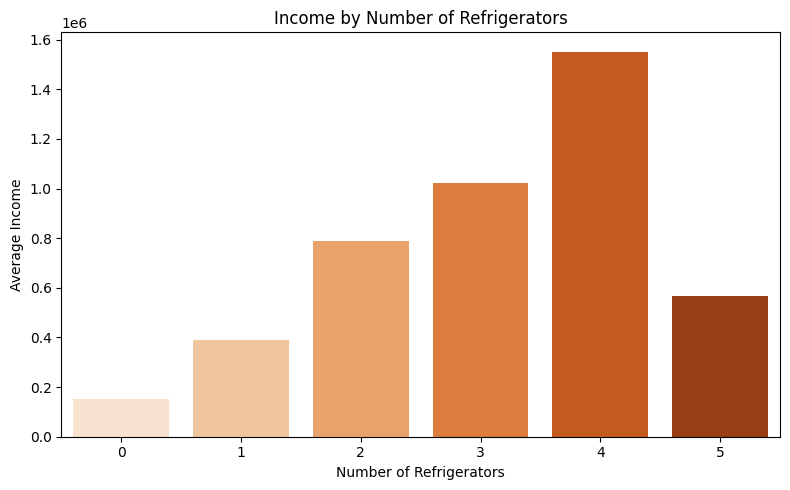

In [38]:
fridge_income = df.groupby("Number of Refrigerator/Freezer")["Total Household Income"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=fridge_income.index.astype(str), y=fridge_income.values, palette="Oranges")
plt.title("Income by Number of Refrigerators")
plt.xlabel("Number of Refrigerators")
plt.ylabel("Average Income")
plt.tight_layout()
plt.show()

<h1>Insight 10.</h1>
<h2>Households that have refrigerators usually earn more money, so having a refrigerator is a sign that a household is better off financially.</h2>

<h1>Question 11.</h1>
<h2>What is the average number of employed family members per region?</h2>

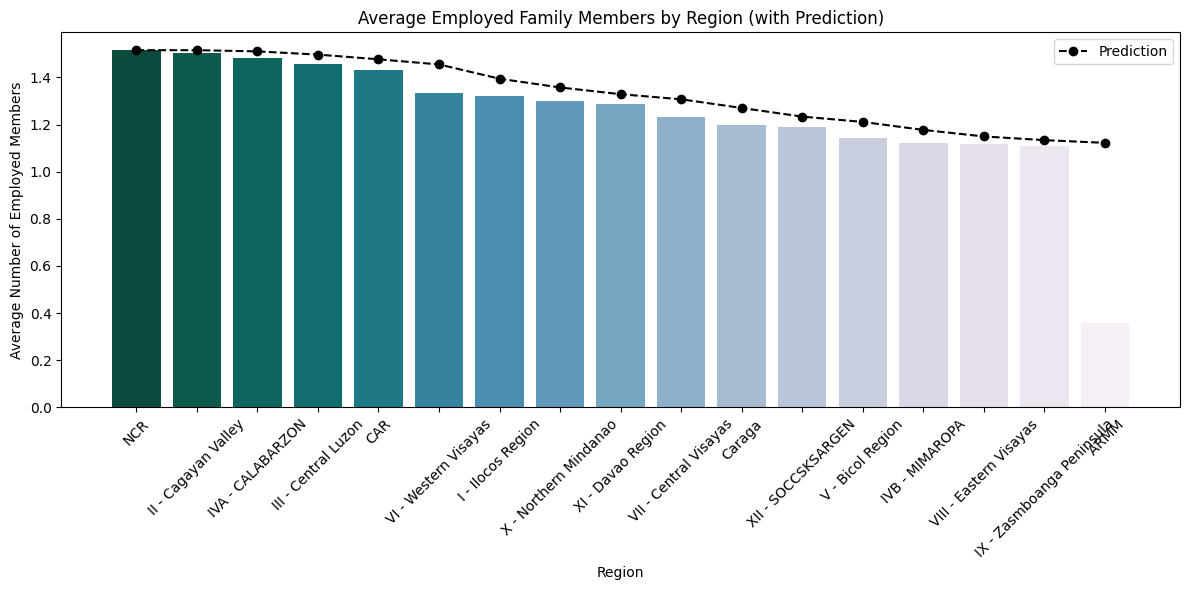

In [42]:
employed_region = df.groupby("Region")["Total number of family members employed"].mean().sort_values(ascending=False)

ses_model = SimpleExpSmoothing(employed_region.values).fit(smoothing_level=0.5, optimized=False)
smoothed_values = ses_model.fittedvalues


plt.figure(figsize=(12,6))
sns.barplot(x=employed_region.index, y=employed_region.values, palette="PuBuGn_r")


plt.plot(employed_region.index, smoothed_values, marker='o', color='black', linestyle='--', label="Prediction")
plt.xticks(rotation=45)
plt.title("Average Employed Family Members by Region (with Prediction)")
plt.ylabel("Average Number of Employed Members")
plt.legend()
plt.tight_layout()
plt.show()


<h1>Insight 11.</h1>
<h2>Regions with higher employment per household often align with higher income regions.</h2>

<h1>Question 12.</h1>
<h2>What is the average medical expenditure per region?</h2>

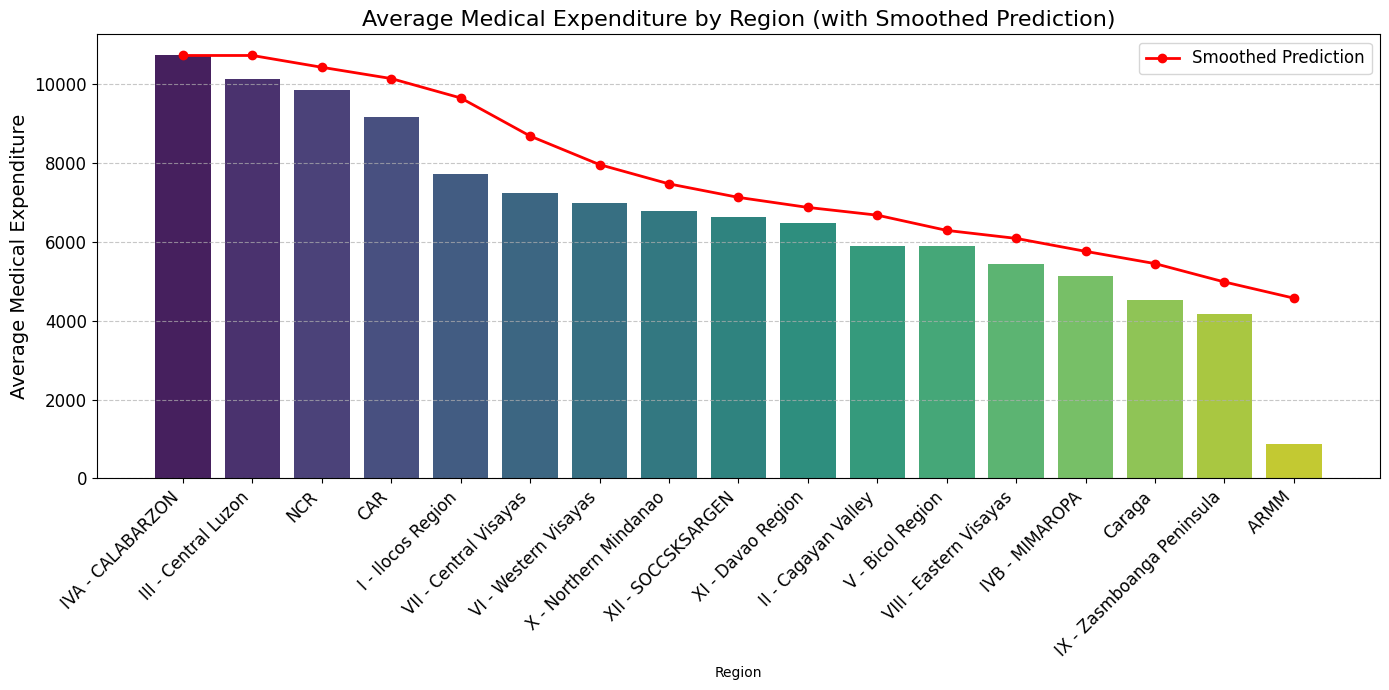

In [47]:
medical_region = df.groupby("Region")["Medical Care Expenditure"].mean().sort_values(ascending=False)
ses_model = SimpleExpSmoothing(medical_region.values).fit(smoothing_level=0.5, optimized=False)
smoothed_values = ses_model.fittedvalues

plt.figure(figsize=(14, 7))
sns.barplot(x=medical_region.index, y=medical_region.values, palette="viridis")
plt.plot(medical_region.index, smoothed_values, marker='o', color='red', linestyle='-', linewidth=2, label="Smoothed Prediction")
e
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Average Medical Expenditure by Region (with Smoothed Prediction)", fontsize=16)
plt.ylabel("Average Medical Expenditure", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>Insight 12.</h1>
<h2>TheHigher-income regions tend to spend more on medical care is CALABARZON or REGION 4A</h2>

<h1>Question 13.</h1>
<h2>What is the income distribution based on marital status of the household head?</h2>

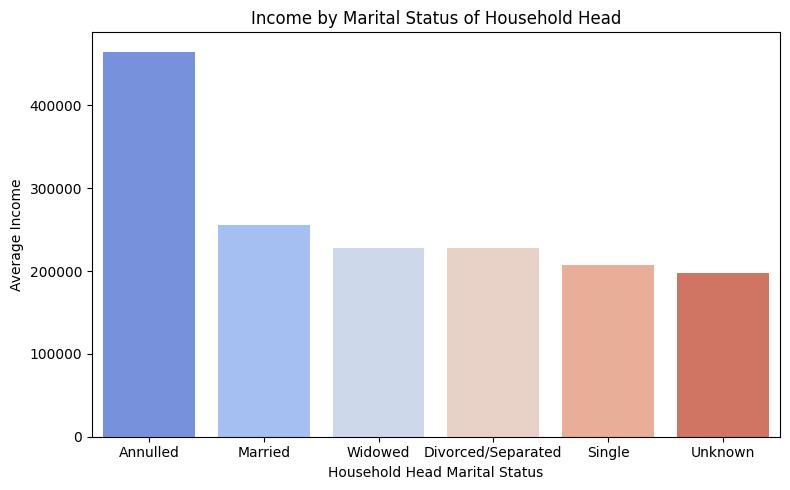

In [49]:
marital_income = df.groupby("Household Head Marital Status")["Total Household Income"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=marital_income.index, y=marital_income.values, palette="coolwarm")
plt.title("Income by Marital Status of Household Head")
plt.ylabel("Average Income")
plt.tight_layout()
plt.show()


<h1>Insight 13.</h1>
<h2> Married household heads tend to have higher household income on average.</h2>

<h1>Question 14.</h1>
<h2>Does owning a washing machine indicate wealth?</h2>

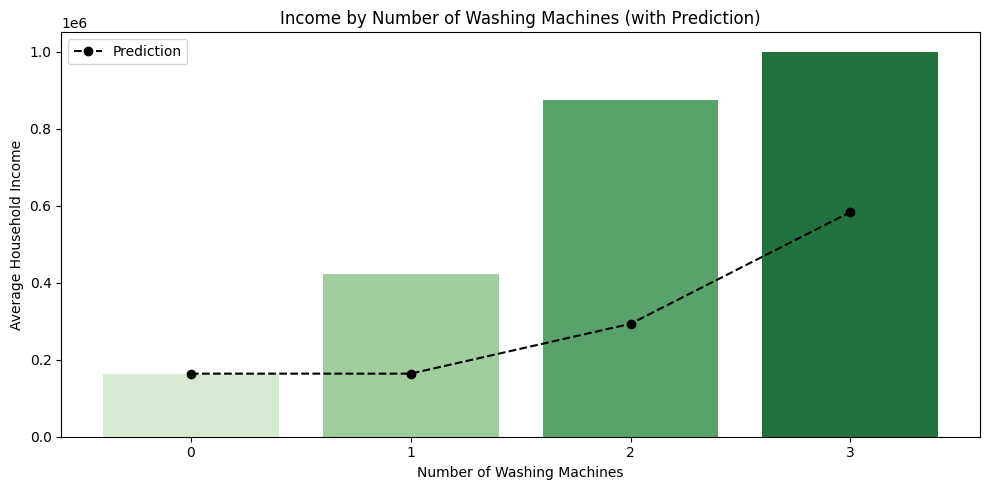

In [53]:
wm_income = df.groupby("Number of Washing Machine")["Total Household Income"].mean()
ses_model = SimpleExpSmoothing(wm_income.values).fit(smoothing_level=0.5, optimized=False)
smoothed_values = ses_model.fittedvalues

plt.figure(figsize=(10,5))
sns.barplot(x=wm_income.index.astype(str), y=wm_income.values, palette="Greens")
plt.plot(wm_income.index.astype(str), smoothed_values, marker='o', color='black', linestyle='--', label="Prediction")
plt.title("Income by Number of Washing Machines (with Prediction)")
plt.xlabel("Number of Washing Machines")
plt.ylabel("Average Household Income")
plt.legend()
plt.tight_layout()
plt.show()


<h1>Insight 14.</h1>
<h2></h2>

<h1>Question 15.</h1>
<h2> What is the most common type of household building?</h2>

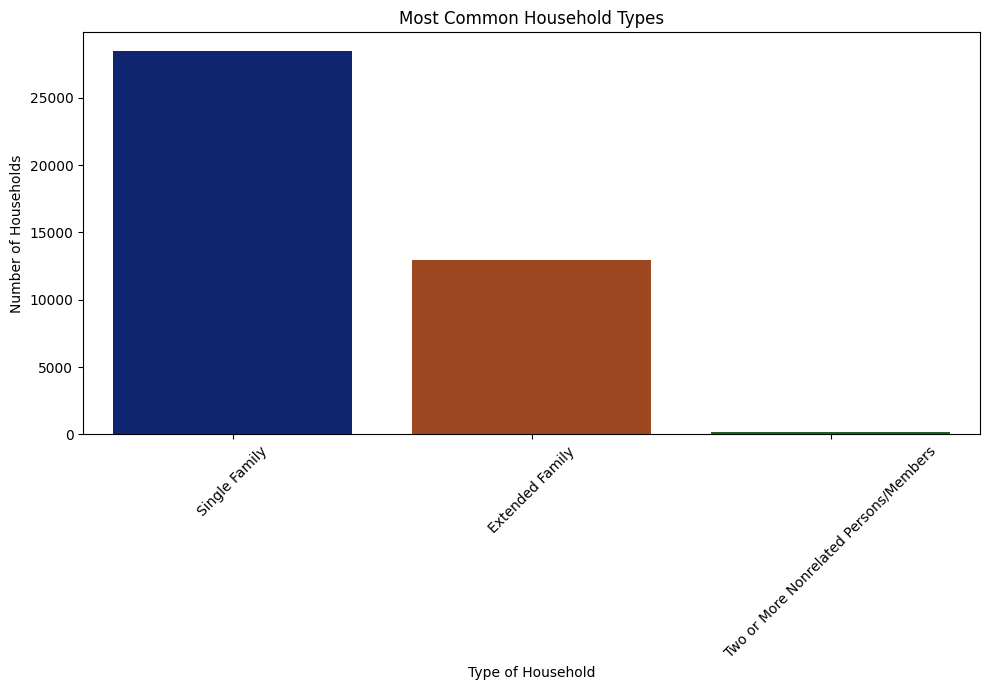

In [56]:
building_counts = df["Type of Household"].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=building_counts.index, y=building_counts.values, palette="dark")
plt.title("Most Common Household Types")
plt.ylabel("Number of Households")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>Insight 15.</h1>
<h2> The most common household type is Single , suggesting a dominance of standalone residences.</h2>

<h1>Question 16.</h1>
<h2>What’s the average number of employed members by household type?</h2>

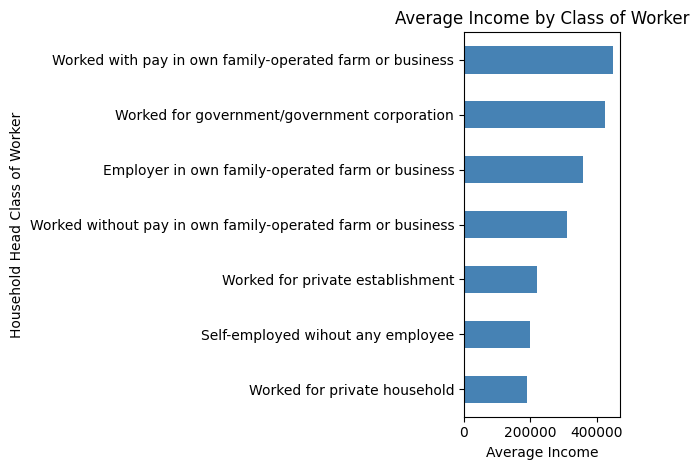

In [58]:
worker_class_income = df.groupby('Household Head Class of Worker')['Total Household Income'].mean().sort_values()
worker_class_income.plot(kind='barh', color='steelblue')
plt.title("Average Income by Class of Worker")
plt.xlabel("Average Income")
plt.tight_layout()
plt.show()

<h1>Inisght 16.</h1>
<h2>Household structure can indicate dependency ratio and economic activity.</h2>

<h1>Question 17.</h1>
<h2>Which region has the lowest average expenditure on transportation?</h2>

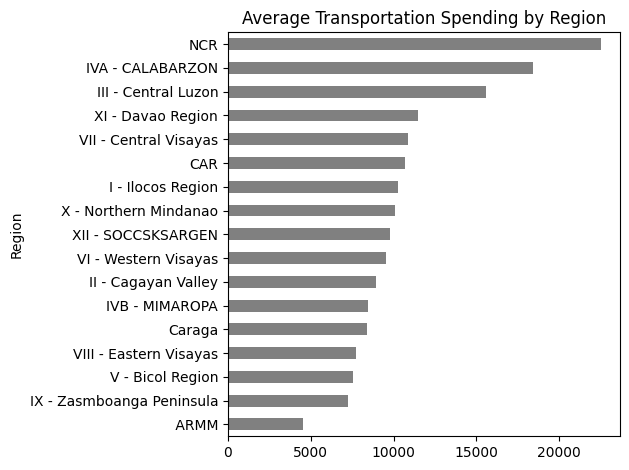

In [60]:
transport = df.groupby('Region')['Transportation Expenditure'].mean().sort_values()
transport.plot(kind='barh', color='gray')
plt.title("Average Transportation Spending by Region")
plt.tight_layout()
plt.show()


<h1>Insight 17.</h1>
<h2>The lowest average expenditure on transportation is ARMM (
Autonomous Region in Muslim Mindanao)</h2>

<h1>Question 18.</h1>
<h2></h2>

<h1>Insight 18.</h1>
<h2></h2>

<h1>Question 19.</h1>
<h2></h2>

<h1>Insight 19.</h1>
<h2></h2>

<h1>Question 20.</h1>
<h2></h2>

<h1>Insight 20.</h1>
<h2></h2>